# Nonlinear Ordinary Differential Equations

## Investigation of the Duffing Equation

### 1. Description of the Differential Equation

#### What is the Duffing Equation?
The Duffing equation is a second-order nonlinear ordinary differential equation that describes the motion of a damped oscillator with a nonlinear restoring force. It can be expressed as:

$$
\frac{d^2x}{dt^2} + \delta \frac{dx}{dt} + \alpha x + \beta x^3 = \gamma \cos{\omega t}
$$

where:
- $x$ is the displacement,
- $t$ is time,
- $\delta$ is the damping coefficient,
- $\alpha$ is the linear stiffness coefficient,
- $\beta$ is the nonlinear stiffness coefficient.
- $\gamma$ is the amplitude of the driving force.
- $\omega$ is the frequency of the driving force.

#### What Does It Model?
The Duffing equation models various physical systems where oscillatory motion is affected by nonlinearity. Some common applications include:
- Mechanical oscillators with nonlinear spring characteristics.
- Vibrating beams and plates.
- Electrical circuits with nonlinear elements (e.g., inductor or capacitor behaviors).

#### Assumptions and Limitations
The Duffing equation is based on several assumptions:
- The displacement $x$ is assumed to be small enough for the linear approximation to be valid.
- The damping term ($\delta$) is treated as constant, which may not be true in all real-world systems.
- The model does not consider large perturbations, which could lead to chaotic behavior unless specifically analyzed under certain conditions.

The equation provides insight into the dynamics of oscillatory systems, but it may not capture all complexities of real-world behavior, particularly in cases of large amplitude oscillations or external forcing.

## 2. Investigate the Duffing Equation Analytically

### Linearization of the Duffing Equation
To analyze the Duffing oscillator, we begin by examining the original Duffing equation:

$$
\frac{d^2x}{dt^2} + \delta \frac{dx}{dt} + \alpha x + \beta x^3 = \gamma \cos{\omega t}
$$

#### Taking Limits on Nonlinear Aspects
We can explore the effects of the nonlinear term by considering two specific limits:

1. **Linear Limit ($\beta = 0$)**: In this case, the Duffing equation reduces to a linear oscillator:
   $$
   \frac{d^2x}{dt^2} + \delta \frac{dx}{dt} + \alpha x = \gamma \cos{\omega t}
   $$
   This system exhibits standard damped harmonic motion, characterized by oscillations that decay over time depending on the damping coefficient $\delta$.

2. **Strong Nonlinear Limit ($\beta \gg \alpha$)**: When the nonlinear term becomes dominant, the behavior of the system will be significantly altered. The equation can no longer be approximated by a simple harmonic oscillator, leading to complex dynamics that may include bifurcations and chaotic behavior.

### Investigating Approximate Behaviors
- **Small Oscillations**: For small amplitudes, we can approximate the system's behavior by neglecting the nonlinear term. The dynamics will closely follow that of a linear oscillator, leading to simple harmonic motion. The period of oscillation can be expressed as:
  $$
  T \approx 2\pi \sqrt{\frac{1}{\alpha}}
  $$

- **Large Oscillations**: For larger amplitudes, the influence of the cubic term becomes significant, and the system may exhibit nonlinear phenomena such as amplitude-dependent frequencies. This can lead to a situation where the frequency of oscillation changes with the amplitude, a characteristic behavior of nonlinear oscillators.

### Claims About Different Regimes
Based on the analysis of limits and approximate behaviors, we can make the following claims regarding the system's behavior in different regimes:

1. **Underdamped Regime** ($\delta < \sqrt{4\alpha}$):
   - The system will oscillate with an exponentially decaying amplitude.
   - Nonlinear effects become more pronounced as the amplitude increases, potentially leading to irregular oscillations.

2. **Critically Damped Regime** ($\delta = \sqrt{4\alpha}$):
   - The system returns to equilibrium as quickly as possible without oscillating.
   - Nonlinear effects are less significant, and the system behaves similarly to the linear case.

3. **Overdamped Regime** ($\delta > \sqrt{4\alpha}$):
   - The system returns to equilibrium without oscillating.
   - The transition to nonlinearity might lead to slower dynamics, with the system taking longer to stabilize.

4. **Nonlinear Dominance** ($\beta \gg \alpha$):
   - In this regime, the dynamics of the system may become chaotic or exhibit complex periodic behaviors.
   - The presence of the nonlinear term can lead to bifurcations, where small changes in parameters cause significant changes in behavior.


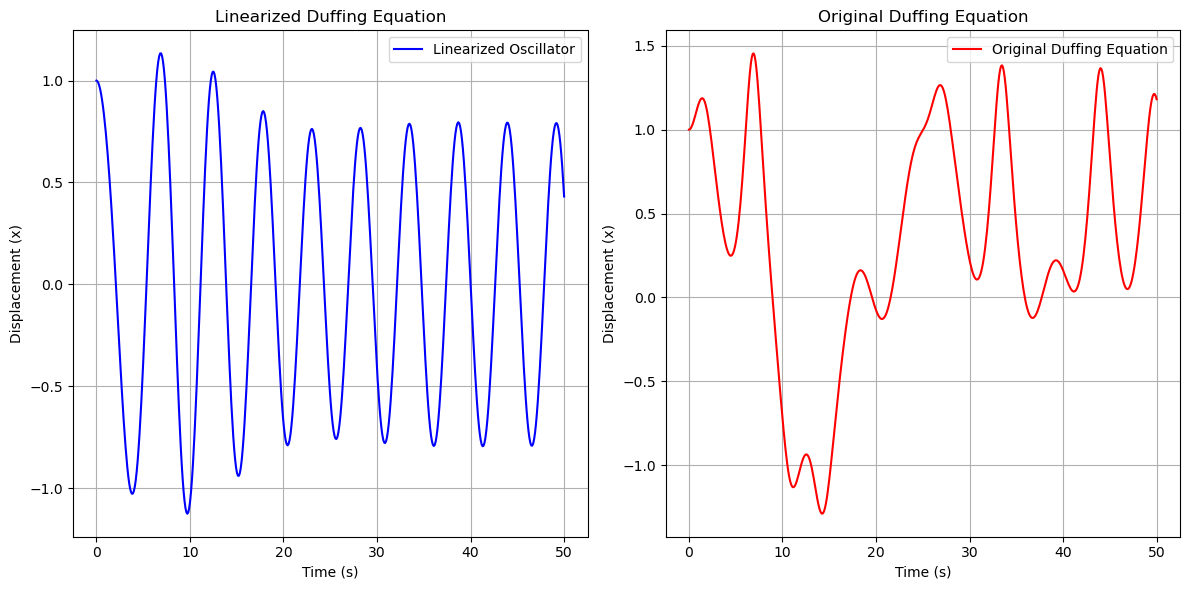

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters for the Duffing Equation
alpha = -1.0   # Linear stiffness coefficient
beta = 1.0    # Nonlinear stiffness coefficient
delta = 0.3   # Damping coefficient
gamma = 0.45   # Amplitude of the periodic driving force
omega = 1.2   # Angular frequency of the periodic driving force

# Define the Duffing Equation
def duffing_eq(t, y, alpha=alpha, beta=beta, delta=delta, gamma=gamma, omega=omega):
    """
    Calculates the derivatives of the Duffing equation for a given time and state.

    Parameters:
    t (float): The current time.
    y (list): The current state [x, v], where x is the position and v is the velocity.
    alpha (float): The linear stiffness coefficient.
    beta (float): The non-linear stiffness coefficient.
    delta (float): The damping coefficient.

    Returns:
    list: The derivatives of the state [dxdt, dvdt], where dxdt is the derivative of x with respect to time
        and dvdt is the derivative of v with respect to time.
    """
    x, v = y
    dxdt = v
    dvdt = -delta * v - alpha * x - beta * x**3 + gamma * np.cos(omega * t)
    return [dxdt, dvdt]

# Initial conditions
y0 = [1.0, 0.0]  # Initial displacement and velocity
t_span = (0, 50) # Time interval for the solution

# Solve the linearized equation
sol_linear = solve_ivp(duffing_eq, t_span, y0, t_eval=np.linspace(0, 50, 500), args=(-alpha, 0, delta, gamma, omega))

# Solve the original Duffing equation
sol_duffing = solve_ivp(duffing_eq, t_span, y0, t_eval=np.linspace(0, 50, 500), args=(alpha, beta, delta, gamma, omega))

# Plotting the results
plt.figure(figsize=(12, 6))

# Linearized solution
plt.subplot(1, 2, 1)
plt.plot(sol_linear.t, sol_linear.y[0], label='Linearized Oscillator', color='blue')
plt.title('Linearized Duffing Equation')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (x)')
plt.grid()
plt.legend()

# Original Duffing solution
plt.subplot(1, 2, 2)
plt.plot(sol_duffing.t, sol_duffing.y[0], label='Original Duffing Equation', color='red')
plt.title('Original Duffing Equation')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (x)')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

### Comparing the Linear Form vs. Full Duffing Model

As expected, for small oscillation amplitudes, there is not much difference in how both these models operate. We also keep alpha positive for the linear approximation of the duffing model otherwise the solution blows up since there is no restorative force. An example is given at the end. To bring out the non-linearity in the Duffing Model, we will now increase the amplitude 10-fold, changing the starting position from 1 to 10.

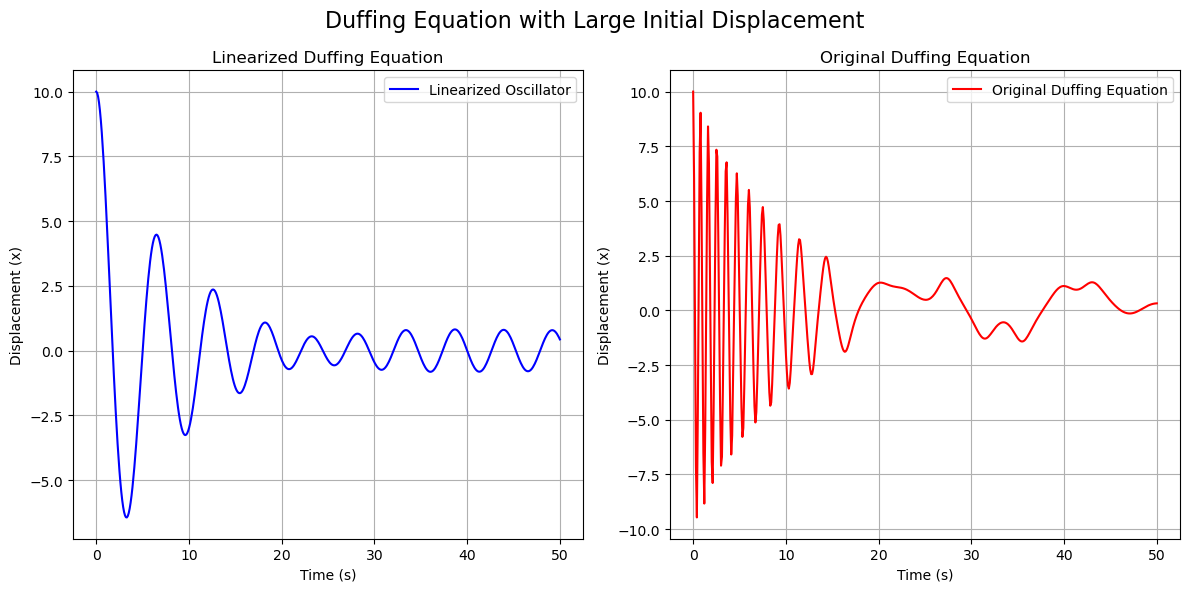

In [42]:
# Initial conditions
y0 = [10, 0.0]  # Initial displacement and velocity
t_span = (0, 50) # Time interval for the solution

# Solve the linearized equation
sol_linear = solve_ivp(duffing_eq, t_span, y0, t_eval=np.linspace(0, 50, 500), args=(-alpha, 0, delta, gamma, omega))

# Solve the original Duffing equation
sol_duffing = solve_ivp(duffing_eq, t_span, y0, t_eval=np.linspace(0, 50, 500), args=(alpha, beta, delta, gamma, omega))

# Plotting the results
plt.figure(figsize=(12, 6))

# Linearized solution
plt.subplot(1, 2, 1)
plt.plot(sol_linear.t, sol_linear.y[0], label='Linearized Oscillator', color='blue')
plt.title('Linearized Duffing Equation')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (x)')
plt.grid()
plt.legend()

# Original Duffing solution
plt.subplot(1, 2, 2)
plt.plot(sol_duffing.t, sol_duffing.y[0], label='Original Duffing Equation', color='red')
plt.title('Original Duffing Equation')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (x)')
plt.grid()
plt.legend()
plt.suptitle('Duffing Equation with Large Initial Displacement', fontsize=16)
plt.tight_layout()
plt.show()

**Now the impact of the nonlinear term is much more evident.**

## 3. Computational Investigation of the Duffing Equation

### Phase Space Diagram
To gain deeper insights into the dynamics of the Duffing oscillator, we will create a phase space diagram. The phase space provides a graphical representation of the system's trajectories in terms of position $x$ and velocity $v$. It allows us to visualize how the state of the system evolves over time.

### Creating the Phase Space Diagram
The phase space is defined by the variables $x$ (displacement) and $v$ (velocity). By integrating the Duffing equation over a specified time range, we can plot the trajectories in this space.

### Visualizing the Impact of Large Amplitude
Same as before, we make two plots - one with a small amplitude, one with a much larger amplitude. This way we can visualize the nonlinearity of the model in the phase space.

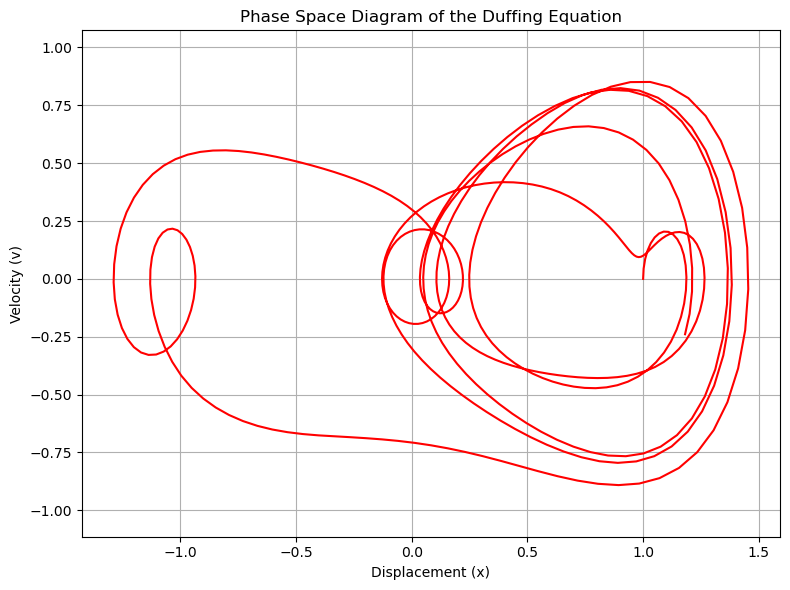

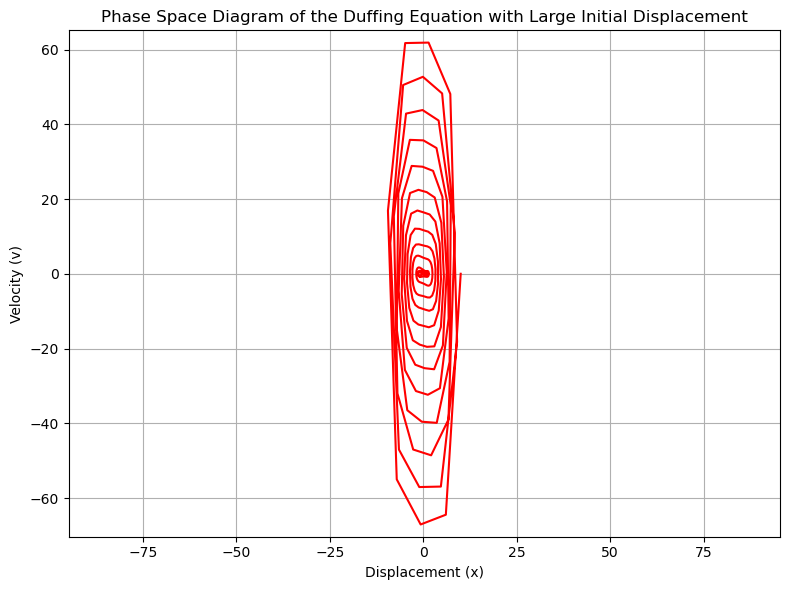

In [43]:
# Generate phase space for the original Duffing equation
def plot_phase_space(duffing_solution, title='Phase Space Diagram of the Duffing Equation'):
    """
    Plots the phase space diagram of the Duffing Equation.

    Parameters:
    - duffing_solution: The solution of the Duffing Equation.

    Returns:
    None
    """
    plt.figure(figsize=(8, 6))
    plt.subplot(1, 1, 1)
    plt.plot(duffing_solution.y[0], duffing_solution.y[1], color='red')
    plt.title(title)
    plt.xlabel('Displacement (x)')
    plt.ylabel('Velocity (v)')
    plt.grid()
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

beta = 1.0   # Nonlinear stiffness coefficient

# Solve the original Duffing equation
y0 = [1.0, 0.0]  # Initial displacement and velocity
sol_duffing = solve_ivp(duffing_eq, t_span, y0, t_eval=np.linspace(0, 50, 500), args=(alpha, beta, delta, gamma, omega))

# Plot the phase space
plot_phase_space(sol_duffing)

# Solve the original Duffing equation with large initial displacement
y0 = [10.0, 0.0]  # Initial displacement and velocity
sol_duffing = solve_ivp(duffing_eq, t_span, y0, t_eval=np.linspace(0, 50, 500), args=(alpha, beta, delta, gamma, omega))

# Plot the phase space 
plot_phase_space(sol_duffing, title='Phase Space Diagram of the Duffing Equation with Large Initial Displacement')

### Describing the Evolution of Trajectories

The trajectories computed for various initial conditions illustrate how the system evolves over time:

• **Small Initial Displacement**: Systems starting with small initial displacements tend to exhibit stable periodic orbits.

• **Larger Initial Displacement**: As the initial displacement increases, the system shows a tendency towards complex behaviors, potentially leading to chaos or bifurcations in the phase space.

• **Sensitivity to Initial Conditions**: The trajectories demonstrate sensitive dependence on initial conditions, a hallmark of chaotic systems, where even slight changes in starting conditions lead to divergent outcomes.

## 4. Visualizing Each Regime

In the code below we try to visualize each regime that was discussed above, and compare it to the original duffing solution. We plot both displacement over time and the phase space diagram for each regime. To bring out the effect of the nonlinearity in the duffing model, we increase the amplitude from 1 to 2.

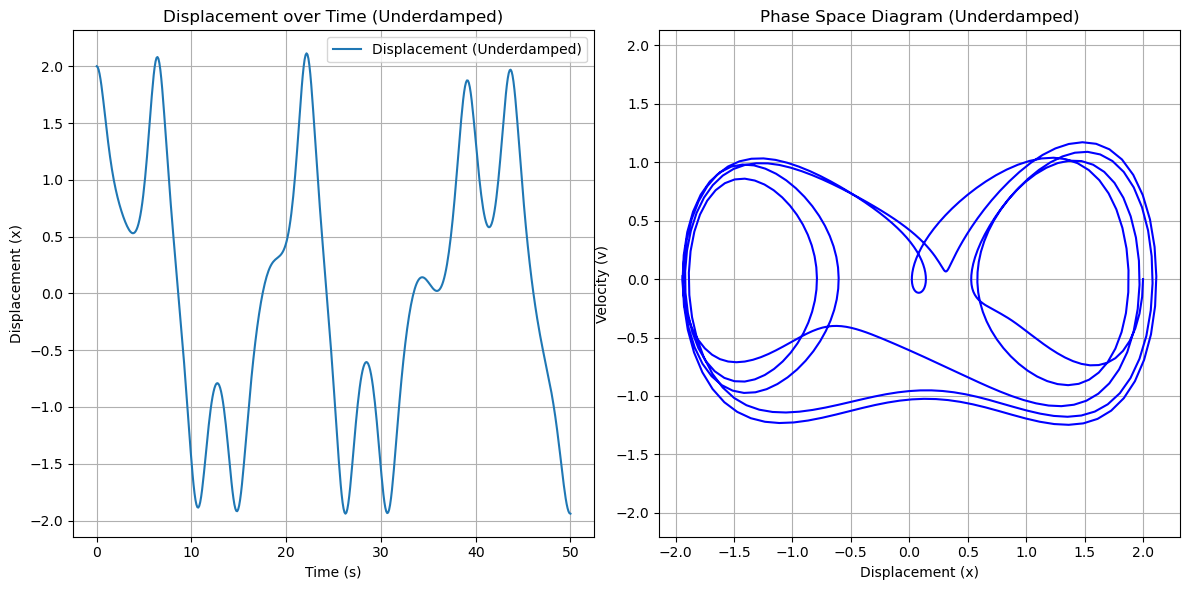

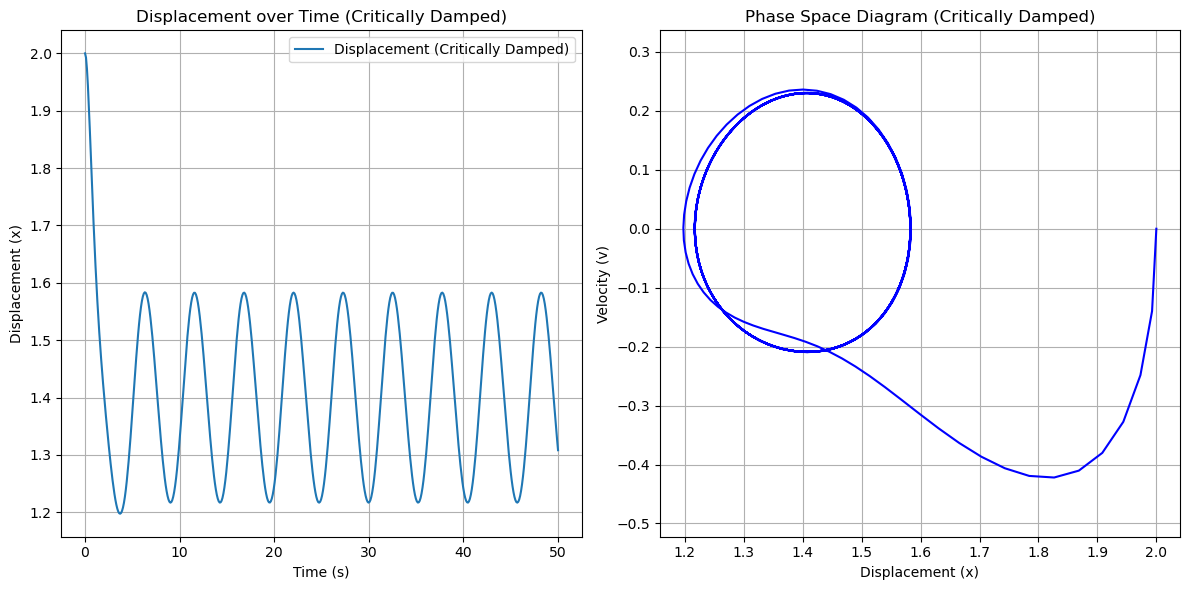

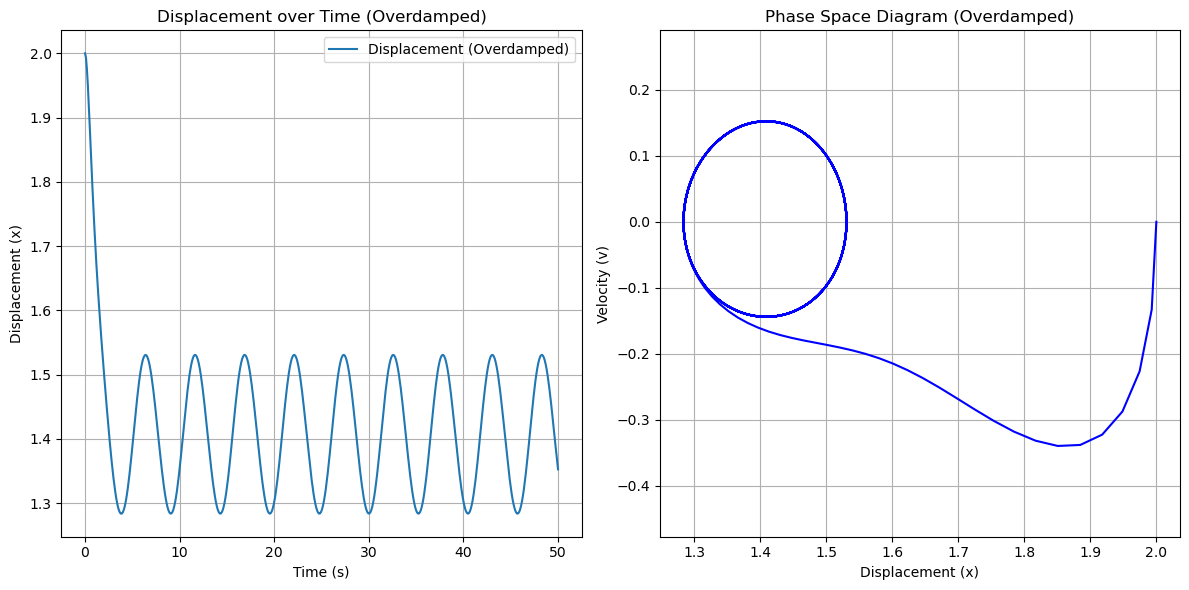

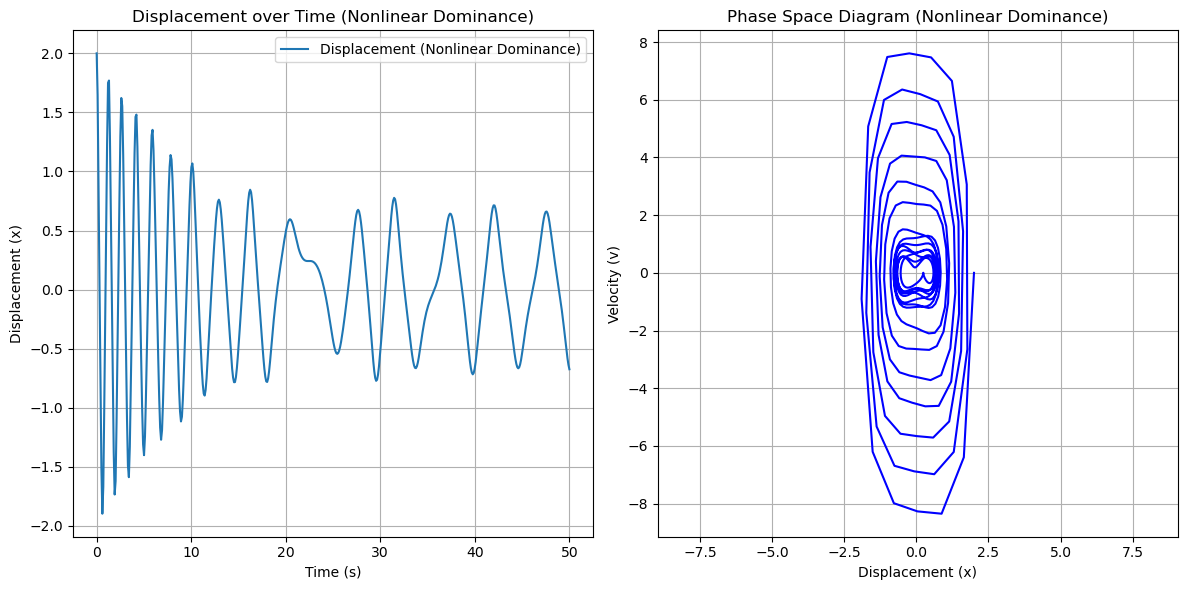

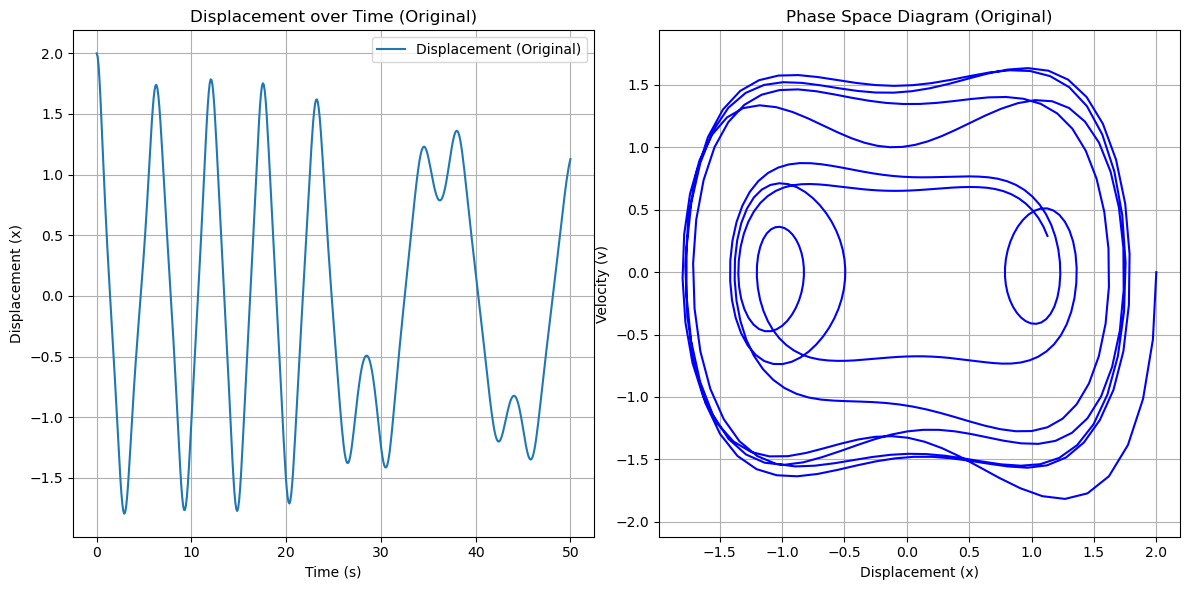

In [59]:
def plot_duffing_regimes(alpha, beta, delta, initial_conditions, t_span, regime_name):
    """
    Plots the displacement over time and phase space diagram for the Duffing equation in different regimes.

    Parameters:
    - alpha (float): The coefficient of the cubic term in the Duffing equation.
    - beta (float): The coefficient of the quadratic term in the Duffing equation.
    - delta (float): The coefficient of the linear term in the Duffing equation.
    - initial_conditions (array-like): The initial conditions for the displacement and velocity.
    - t_span (tuple): The time span over which to solve the Duffing equation.
    - regime_name (str): The name of the regime for labeling the plots.

    Returns:
    None
    """
    # Solve the Duffing equation
    sol = solve_ivp(duffing_eq, t_span, initial_conditions, args=(alpha, beta, delta), t_eval=np.linspace(t_span[0], t_span[1], 500))
    
    # Plot displacement over time
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.plot(sol.t, sol.y[0], label=f'Displacement ({regime_name})')
    plt.title(f'Displacement over Time ({regime_name})')
    plt.xlabel('Time (s)')
    plt.ylabel('Displacement (x)')
    plt.grid()
    plt.legend()
    
    # Plot phase space
    plt.subplot(1, 2, 2)
    plt.plot(sol.y[0], sol.y[1], color='blue')
    plt.title(f'Phase Space Diagram ({regime_name})')
    plt.xlabel('Displacement (x)')
    plt.ylabel('Velocity (v)')
    plt.grid()
    plt.axis('equal')
    
    plt.tight_layout()
    plt.show()

# Define parameters for different regimes
parameters = {
    "Underdamped": (-1.0, 0.5, 0.2, [2.0, 0.0], (0, 50)),       # Underdamped regime
    "Critically Damped": (-1.0, 0.5, 2.0, [2.0, 0.0], (0, 50)),  # Critical damping
    "Overdamped": (-1.0, 0.5, 3.0,[2.0, 0.0], (0, 50)),        # Overdamped regime
    "Nonlinear Dominance": (-1.0, 10.0, 0.2,[2.0, 0.0], (0, 50)), # Nonlinear dominance
    "Original": (-1.0, 1.0, 0.2, [2.0, 0.0], (0, 50))           # Original parameters
}

# Plot the different regimes
for regime, params in parameters.items():
    plot_duffing_regimes(*params, regime_name=regime)

## Exploration of a Tunable Parameter: Nonlinear Stiffness Coefficient (β)

In this section, we investigate the effects of varying the nonlinear stiffness coefficient $ \beta $ on the dynamics of the Duffing oscillator. The Duffing equation is known for its complex behavior, which can change significantly based on the values of its parameters.

### Tunable Parameter: β

For this exploration, we treat $ \beta $ as a tunable parameter. By systematically varying $ \beta $, we can observe how the behavior of the system changes. We will consider the following values of $ \beta $:
- $ \beta  = 0.0$: Linear oscillator with no nonlinear effects.
- $ \beta  = 0.1$: Mild nonlinearity.
- $ \beta  = 0.5$: Moderate nonlinearity.
- $ \beta  = 1.0$: Strong nonlinearity.

### Computational Investigation

We will compute the trajectories and phase space diagrams for each value of $ \beta $. This investigation will allow us to analyze how the system transitions from periodic to potentially chaotic behavior as $ \beta $ increases.

### Expected Outcomes

- **Linear Regime ($ \beta  = 0.0$)**: The system is expected to behave like a simple harmonic oscillator, resulting in sinusoidal oscillations.
- **Mild Nonlinearity ($ \beta  = 0.1$)**: We expect some distortion in the oscillation shape but still periodic behavior.
- **Moderate Nonlinearity ($ \beta  = 0.5$)**: The system may show more pronounced nonlinear characteristics, potentially leading to bifurcations.
- **Strong Nonlinearity ($ \beta  = 1.0$)**: The system may exhibit chaotic behavior, where small changes in initial conditions result in significantly different trajectories.

### Visualizations

The following visualizations illustrate the displacement over time and the phase space for different values of $ \beta $. Each subplot represents the behavior of the Duffing oscillator as the nonlinear stiffness coefficient is varied, showcasing the rich dynamics of this system.

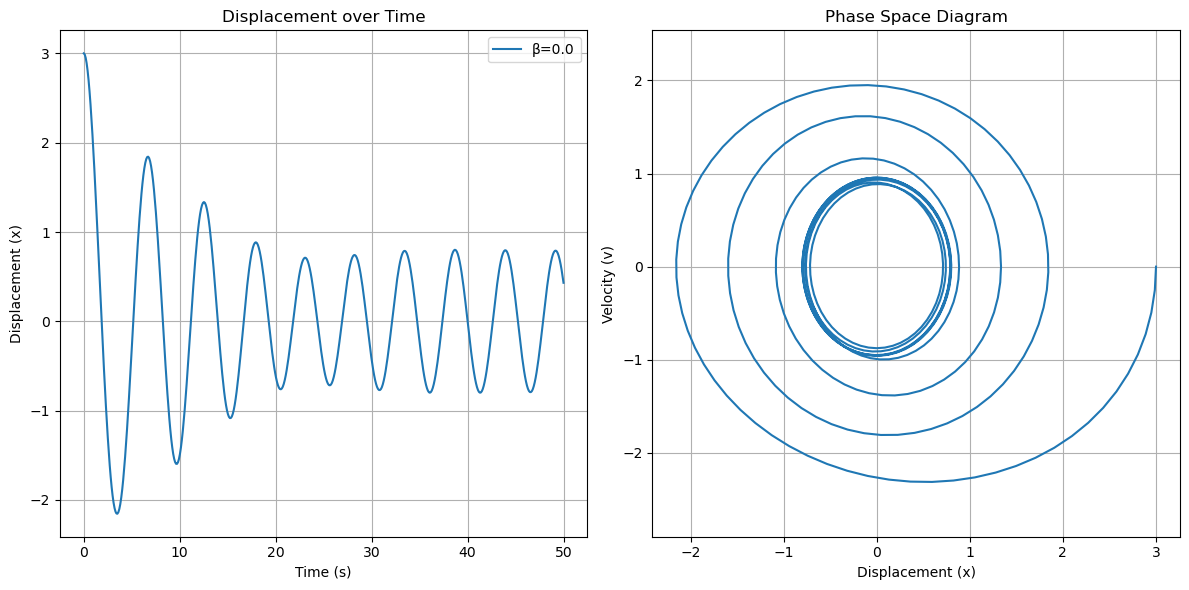

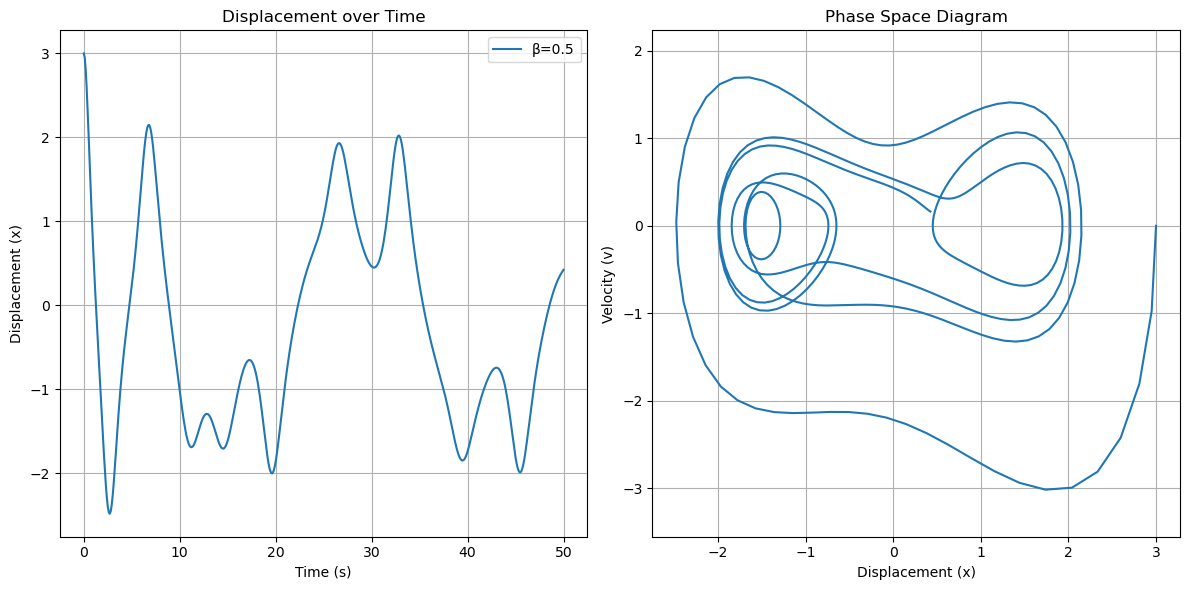

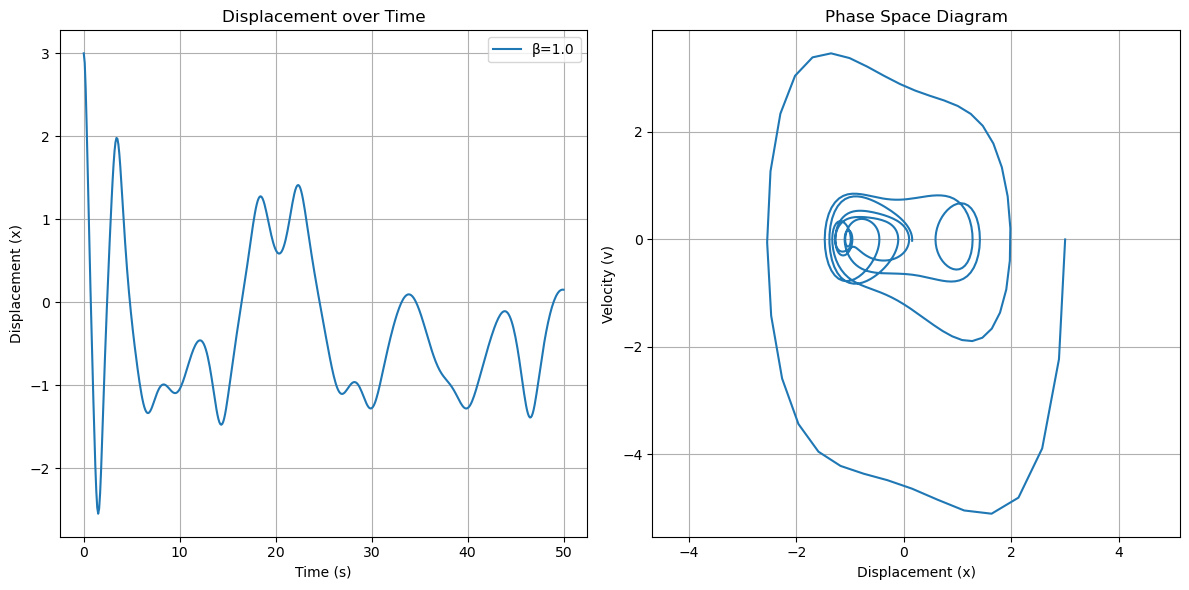

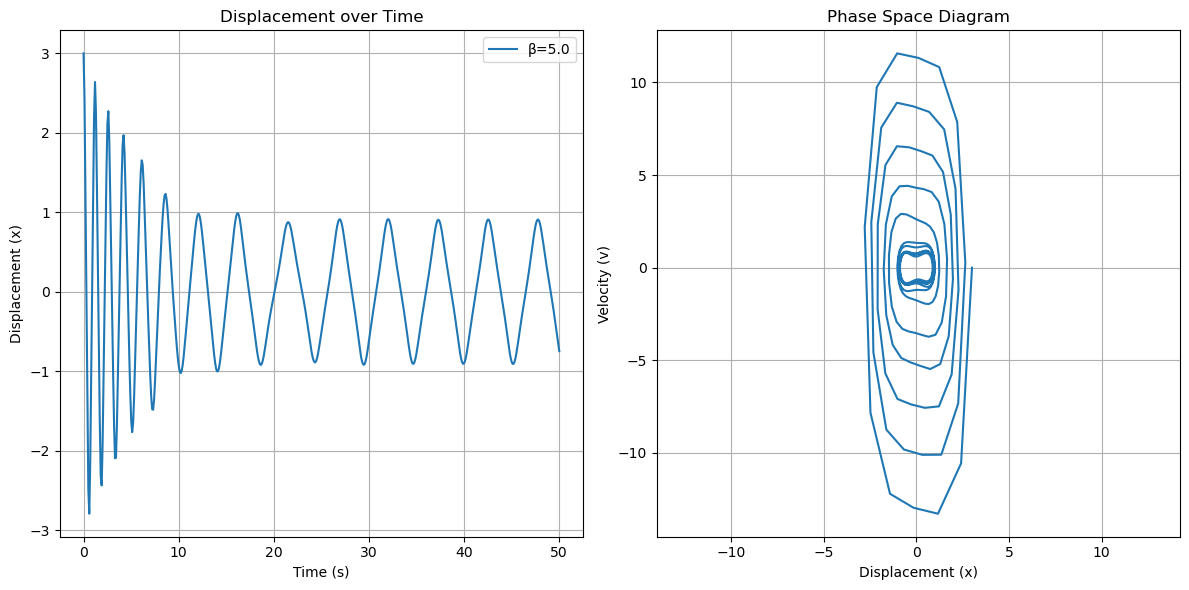

In [60]:
# Define a function to explore a tunable parameter (beta)
def explore_tunable_parameter(initial_conditions, t_span, beta_values):
    for beta in beta_values:
        # Solve the Duffing equation with the current beta value
        if beta==0:
            alpha = 1.0
        else:
            alpha = -1.0
        sol = solve_ivp(duffing_eq, t_span, initial_conditions, t_eval=np.linspace(t_span[0], t_span[1], 500), args=(alpha, beta, delta))

        # Plot displacement over time
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.plot(sol.t, sol.y[0], label=f'β={beta}')
        plt.title('Displacement over Time')
        plt.xlabel('Time (s)')
        plt.ylabel('Displacement (x)')
        plt.grid()
        plt.legend()

        # Plot phase space
        plt.subplot(1, 2, 2)
        plt.plot(sol.y[0], sol.y[1], label=f'β={beta}')
        plt.title('Phase Space Diagram')
        plt.xlabel('Displacement (x)')
        plt.ylabel('Velocity (v)')
        plt.grid()
        plt.axis('equal')

        plt.tight_layout()
        plt.show()

# Define a range of beta values to explore
beta_values = [0.0, 0.5, 1.0, 5.0]
initial_conditions = [3.0, 0.0]  # Initial conditions
t_span = (0, 50)  # Time span for the simulation

# Run the exploration
explore_tunable_parameter(initial_conditions, t_span, beta_values)

### What Happens if $\alpha < 0$ For the Linearized Duffing Model

This subsection is to see another edge case - we set $\alpha = -1.0$, as we have for all other duffing models we have visualized so far. However, in the linearized version, this means there is no restorative fore on the oscillator, which means we should expect the displacement to blow up.

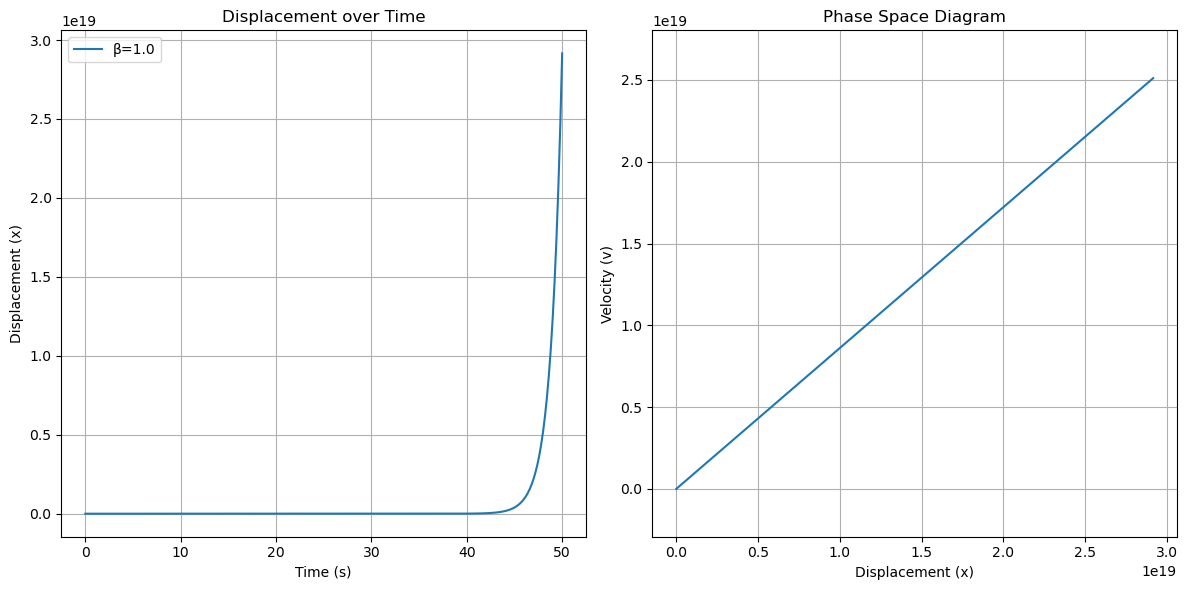

In [56]:
alpha = -1.0   # Linear stiffness coefficient

sol_duffing = solve_ivp(duffing_eq, t_span, y0, t_eval=np.linspace(0, 50, 500), args=(alpha, 0, delta, gamma, omega))

# Plot displacement over time
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(sol_duffing.t, sol_duffing.y[0], label=f'β={beta}')
plt.title('Displacement over Time')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (x)')
plt.grid()
plt.legend()

# Plot phase space
plt.subplot(1, 2, 2)
plt.plot(sol_duffing.y[0], sol_duffing.y[1], label=f'β={beta}')
plt.title('Phase Space Diagram')
plt.xlabel('Displacement (x)')
plt.ylabel('Velocity (v)')
plt.grid()
plt.axis('equal')

plt.tight_layout()
plt.show()

## Bibliography

-**Duffing Model Equations of Motion:** I got the equations and the resulting model from the in-class activity for Sept 17. I got the initial parameters from the same source.

-**Damping Conditions:** I got the equations of different damping regimes from the book *Chaos: A Program Collection for the PC, by Hans Jürgen Korsch , Hans-Jörg Jodl , Timo Hartmann.* Citation DOI: https://doi.org/10.1007/978-3-540-74867-0_8/